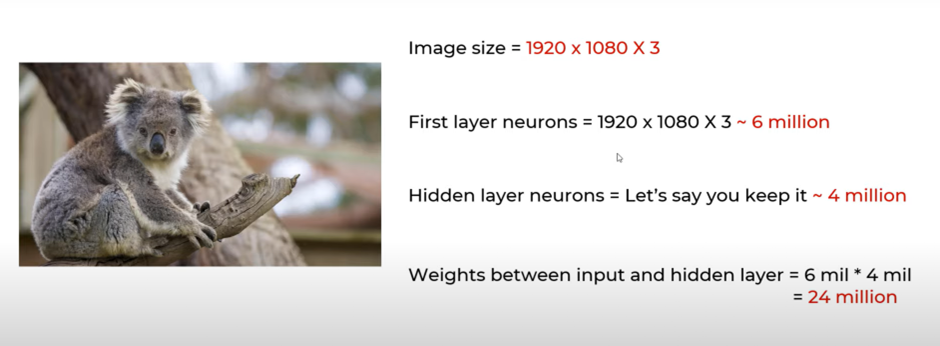

**If we use ANN instead of CNN, computation will be very tedious**


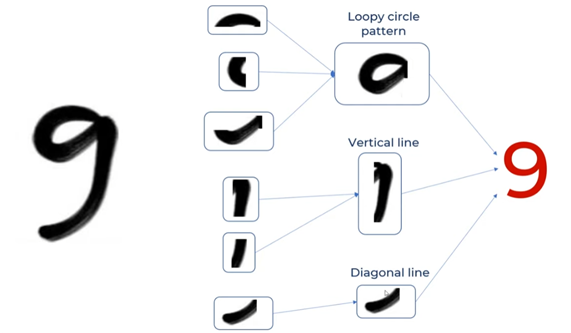

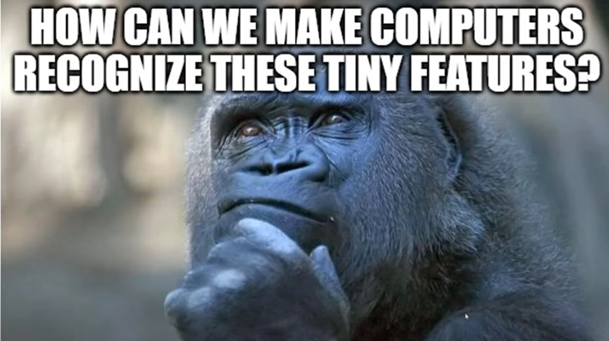

In case of 9 we have 3 filters, loopy patter in the middle the vertical line and the diagonal line

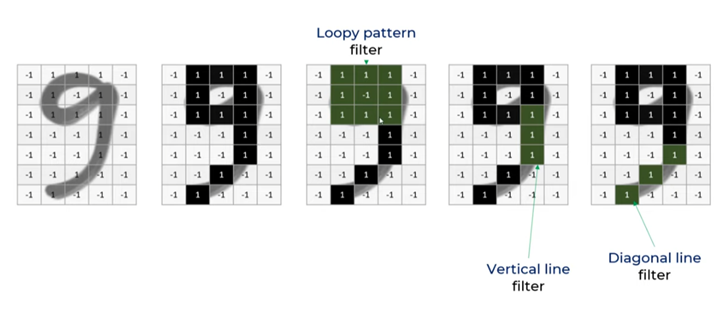

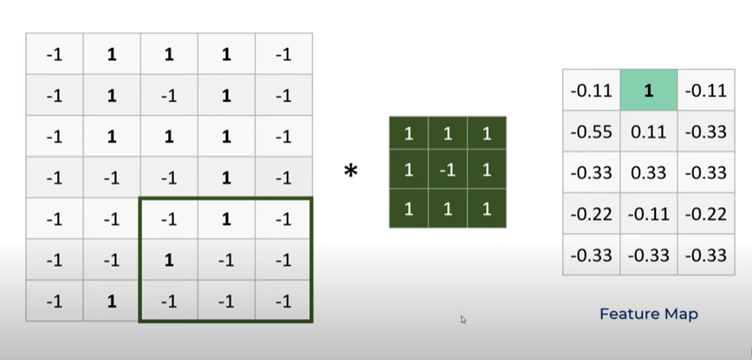

This is a feature map with stride one
Now wherever we see a number close to one, we know in this case that it is a loopy pattern or a feature, in a koala example this may be a nose or a ear

**Filters are nothing but a feature detectors**


**Filters are location invariant, that means, wherever these features are they will be detected**

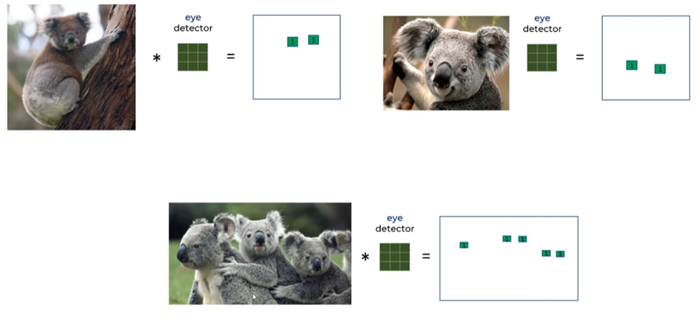

Now in number 9 we have 3 filters, so this is how the filter maps are stacked

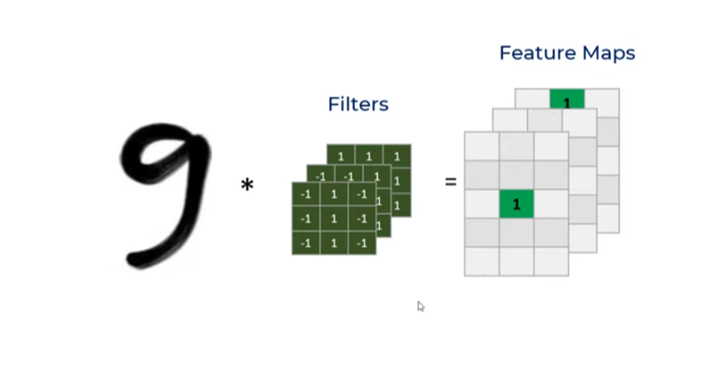

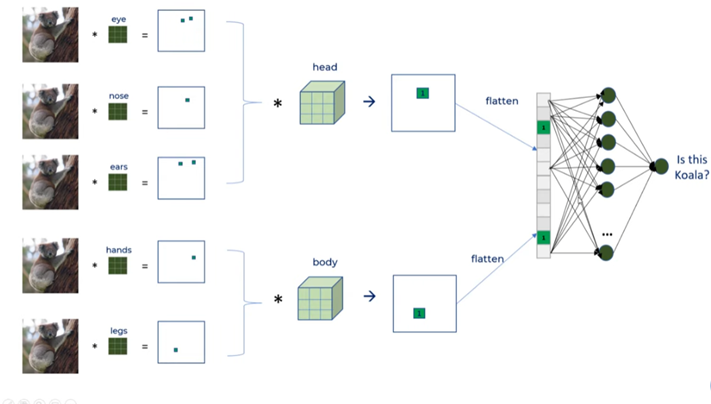



The filters can be in 3d which then form a feature map, and when flattened and we join them together, this makes a fully connected dense neural network.
Neural networks are used to handle the variety in your inputs such that It can classify the variety of inputs in a generic way
We then have to apply an activation function. Now any kind of activation function works to bring a linearity in our model, but in this case we are gonna be using RelU activation. It changes the negative values in a feature map to 0 and keeps the other values as it is


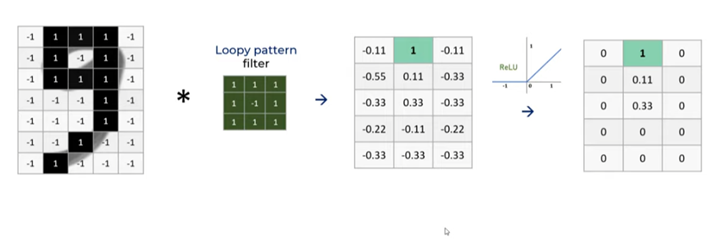

**Pooling is used to reduce the size**

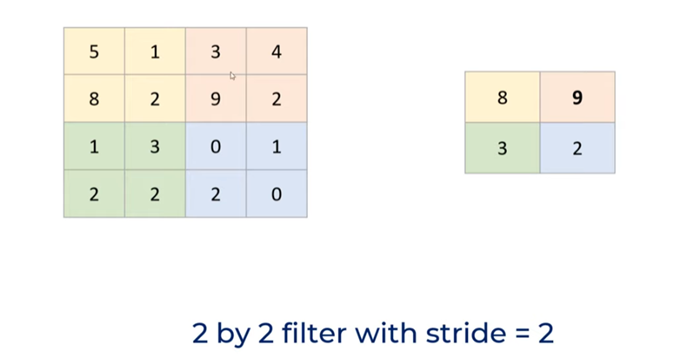

This is called max pooling (max number from a set). We take a feature map apply pooling and generate new feature map) we reduce 16 numbers into 4. We did stride two

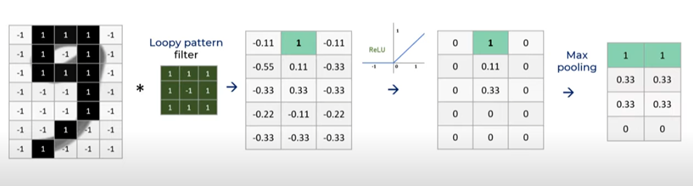

This is pooling with stride one, stride means by how many numbers do you shift
Max pooling with convolution helps with position invariant feature selection.
We can use average pooling instead on max pooling, second benefit it reduces overfitting as there less parameters and model is tolerant towards variations distortion as we filter all the noise


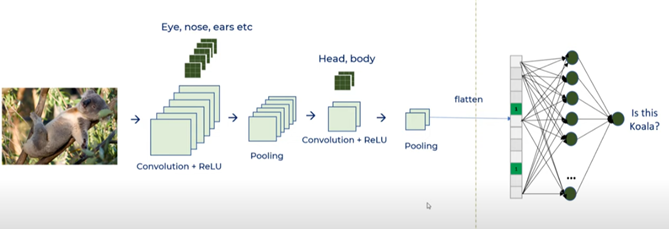

This is what a CNN model looks like
not every node is connected with every other node like in artificial neural network where we call that a dense network here we have a filter which we move around the image and at a time we are talking about only a local region so we are not affecting the whole image

CNN by itself does not take care of rotation and scaling for that you can use image processing techniques


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]
#converting 2d array to 1d array

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)


In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) #resizing the image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

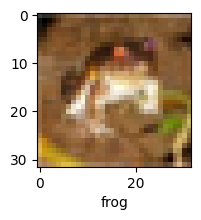

In [ ]:
plot_sample(X_train, y_train, 0)
#passinf in the first element which is 6 in the array and the 6 th class in the dataset is a frog as you can see

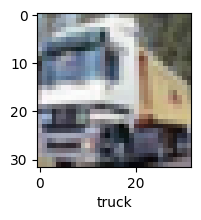

In [ ]:
plot_sample(X_train, y_train, 1)
#1 is 9 in the array which is truck in the dataset

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#Normalize our data, pixel value ranges form 0-255, we are normalizing the value between 0 and 1 range


Build simple artificial neural network for image classification




In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), #first layer or flatten layer accepts the shape of 32,32,3
        layers.Dense(3000, activation='relu'), # two deep layers
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax') #output layer is 10 as it has 10 categories
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 184s 117ms/step - loss: 1.8082 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.6213 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 157s 100ms/step - loss: 1.5391 - accuracy: 0.4553
Epoch 4/5
1563/1563 [==============================] - 150s 96ms/step - loss: 1.4809 - accuracy: 0.4777
Epoch 5/5
1563/1563 [==============================] - 151s 97ms/step - loss: 1.4297 - accuracy: 0.4973


**What are optimizers**

Optimizers in neural networks are algorithms or methods used to minimize the loss function or to maximize the efficiency of production. They are mathematical functions that are dependent on the model’s learnable parameters, such as weights and biases


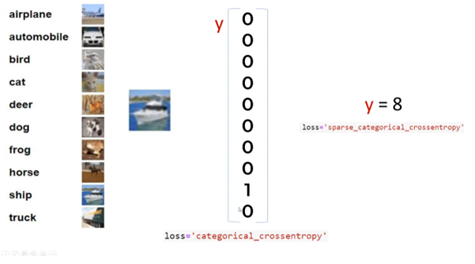


When it is a encoded vector it we use categorical_crossentropy and when it is just a single number we use Sparce_categorical_crossentropy


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), #filters=32 how many features can it detec, filter size is kernel size whcih is a 3x3 matrix
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4832 - accuracy: 0.4667
Epoch 2/10
1563/1563 [==============================] - 62s 40ms/step - loss: 1.1225 - accuracy: 0.6055
Epoch 3/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9889 - accuracy: 0.6537
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9017 - accuracy: 0.6865
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8325 - accuracy: 0.7104
Epoch 6/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.7798 - accuracy: 0.7306
Epoch 7/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7336 - accuracy: 0.7444
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6916 - accuracy: 0.7587
Epoch 9/10
1563/1563 [==============================] - 62s 39ms/step - loss: 0.6541 - accuracy: 0.7727
Epoch 10/10
1563/1563 [==============================] - 61s 39m

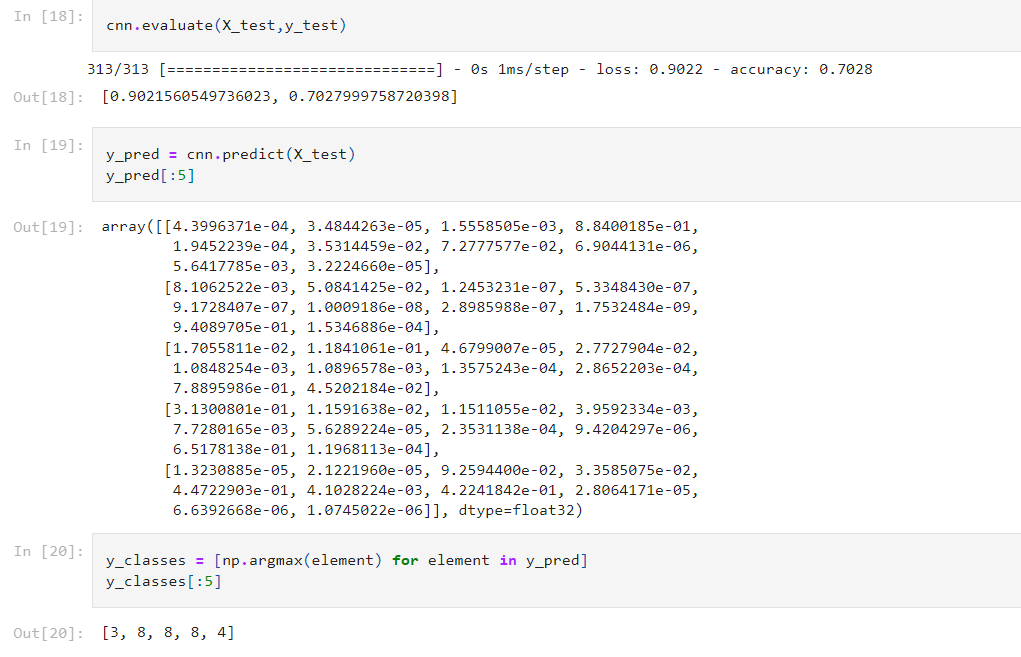

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 9s 27ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.62      0.55      1000
           1       0.55      0.66      0.60      1000
           2       0.38      0.38      0.38      1000
           3       0.35      0.22      0.27      1000
           4       0.48      0.30      0.37      1000
           5       0.34      0.51      0.40      1000
           6       0.64      0.36      0.46      1000
           7       0.68      0.42      0.52      1000
           8       0.61      0.62      0.62      1000
           9       0.43      0.69      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000

